<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---
# Choose your ML problems

이번 스프린트에서는 포트폴리오 프로젝트를 위해 수강생 각자가 정한 데이터셋을 사용하여 과제를 수행합니다. 프로젝트를 위한 데이터를 최종 선택하기 전에 여러 가능한 데이터세트를 살펴보고 간단한 모델까지 학습해 보는 것을 추천드립니다.

### 1) 타겟으로 사용할 특성을 선택합니다.
**(Urclass Quiz)** 여러분들이 프로젝트에 사용할 데이터셋과 타겟특성에 대해 아래의 내용을 포함하여 간략하게 설명해주세요. 
* `df.dtypes`을 사용해서 타겟특성의 데이터 타입 확인
* `df.describe()`를 사용해서 타겟특성의 대표값 확인(실수-평균, 범주형-최빈값)

Invoice id: 송장식별번호

Branch: Supercenter의 위치(A, B, C로 식별되는 3개의 위치)

City: 슈퍼센터의 위치

Customer type: 회원 카드를 사용하는 고객의 경우 Member 기록하고 회원 카드가 없는 고객의 경우 Normal 고객으로 기록합니다.

Gender: Gender type of customer

Product line: 일반 품목 분류 그룹 - 전자 액세서리, 패션 액세서리, 식품 및 음료, 건강 및 미용, 가정 및 라이프스타일, 스포츠 및 여행

Unit price: 각 제품 가격(달러)

Quantity: 고객이 구매한 제품 수

Tax: 고객 구매 시 5%의 세금 수수료

Total: 세금을 포함한 총액

Date: 구매일 (기록은 2019년 1월 ~ 2019년 3월)

Time: 구매시간 (오전10시~오후9시)

Payment: 고객이 구매 시 사용한 결제(현금, 신용카드, 이월렛 등 3가지 방법)

COGS: 판매된 상품의 원가

Gross margin percentage: 총 마진율

Gross income: 총수입

Rating: 전체 쇼핑 경험에 대한 고객 계층화 등급(1~10등급)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [16]:
list_1=list(df.columns)
# 칼럼들 리스트화.
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)
#dtype : 칼럼의 데이터가 object 인것만 따로 빼서 list_cate에 추가.        
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_cate:
    df[i]=le.fit_transform(df[i])
#라벨인코더 사용.

In [25]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3


In [ ]:
#Customer type = 0이면 member 1이면 Normal

In [7]:
df.shape

(1000, 17)

In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

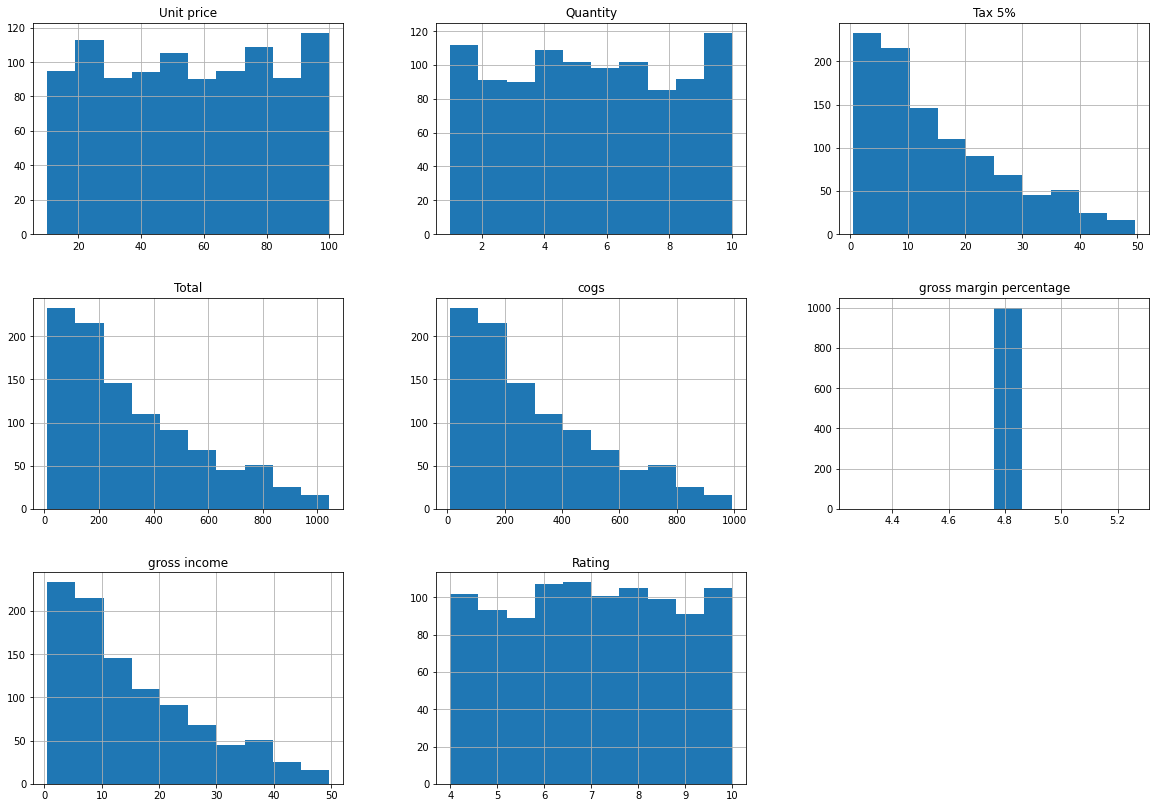

In [9]:
df.hist(figsize=(20,14))
plt.show()

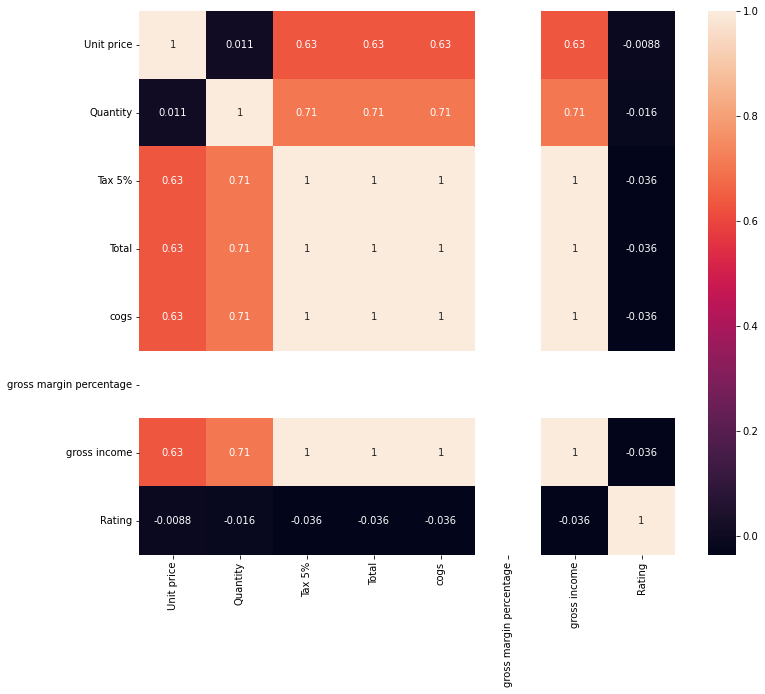

In [15]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)

### 2) 풀고자 하는 문제가 분류/회귀 문제인지 정합니다.
**(Urclass Quiz)** 다이아몬드를 보관하기 위해 금고를 만들었습니다. 금고가 너무 작아서 가격이 상위 25%인 것만 보관하려고 합니다. 이를 위해 'price' 특성을 이용해 금고에 보관할 다이아몬드와 그렇지 않은 것으로 분류하는 이진분류 컬럼을 만들어 타겟 특성으로 사용할 것입니다. 타겟 특성의 최빈값의 빈도수를 적어주세요.
- 'top25'라는 새로운 타겟변수(컬럼)를 만들어주세요.
- 상위 25% 이상 True, 상위 25% 미만 False

   

In [10]:
import seaborn as sns
import numpy as np
diamonds = sns.load_dataset('diamonds')

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
diamonds['top25']=(diamonds['price']>diamonds['price'].quantile(q=0.75))

In [12]:
diamonds["top25"].value_counts()

False    40455
True     13485
Name: top25, dtype: int64

### 3) 타겟의 분포를 분석하고 사용할 평가지표를 선택합니다. 평가지표를 선택한 이유를 설명하세요.
- 분류: 클래스가 몇 개인지? 클래스 비율이 어떤지(balance or imbalance)
- 회귀: 타겟 분포가 right-skewed 인지? log-transform을 사용할 것인지?
- 분류: 다수 클래스(majority class) 비율이 50%~70% 인 경우 정확도(accuracy)만 사용해도 무방합니다. 하지만 범위를 넘어설 경우 정확도만을 사용해서는 모델을 잘못 이해할 수 있습니다. 어떤 평가지표를 사용해야 할까요?
- 회귀: MAE, RMSE, R^2 등을 사용할 수 있습니다.

---


**(Urclass Quiz)** 여러분들이 프로젝트에 사용할 데이터의 기준모델과 사용할 평가지표를 제출해주세요.

In [32]:
#target = Customer type

y=df['Customer type']
X=df.drop('Customer type',axis=1)

from sklearn.model_selection import train_test_split
# Step1) train / test 으로 나누기
train, test = train_test_split(df, test_size=0.15, random_state=1)

# Step2) train을 다시 train/validation 으로 나누기
train, val = train_test_split(train, test_size = 0.18, random_state=1)


# 확인
train.shape, val.shape, test.shape

((697, 17), (153, 17), (150, 17))

In [36]:
from sklearn.metrics import accuracy_score

# 모델 만들기
majority_class = train["Customer type"].mode()[0]

# 기준모델의 정확도 계산을 위한 데이터 생성
y_pred = [majority_class] * len(val)

# validation 데이터셋에 대한 정확도 확인
print("최빈 클래스: ", majority_class)
print("validation 데이터셋 정확도: ", accuracy_score(val["Customer type"], y_pred))

# Customer type = 0이면 member 1이면 Normal

최빈 클래스:  1
validation 데이터셋 정확도:  0.477124183006536


## 🔥 도전과제(Github - Discussion)

### 4) 실무에서 데이터분석가/데이터엔지니어/데이터사이언티스트에게 중요한 역량이 무엇이라고 생각하며, 어떤 어려움을 겪게 될 것 같은지와 어떤 능력이 필요할 지 논의해 보세요. 또한, 섹션2 프로젝트에 앞서 본인이 얻고자 하는 점이나 다짐 등을 서로 공유해 보세요. 


In [13]:
### 이곳에서 과제를 진행해 주세요 ### 